In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import impute
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Data

In [3]:
df = pd.read_csv("W3_2_HW_data/HW3_movie_metadata.csv")

In [4]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Explore Data

In [5]:
df.shape

(5043, 27)

In [6]:
df.describe(include='all')

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [7]:
numerical_cols = df._get_numeric_data().columns.tolist()

In [10]:
df._get_numeric_data().columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [11]:
numerical_features=list(set(numerical_cols)-set(['num_critic_for_reviews']))
numerical_features

['actor_1_facebook_likes',
 'actor_2_facebook_likes',
 'imdb_score',
 'gross',
 'aspect_ratio',
 'budget',
 'title_year',
 'movie_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'director_facebook_likes',
 'cast_total_facebook_likes',
 'duration',
 'actor_3_facebook_likes',
 'num_voted_users']

In [12]:
numerical_cols=numerical_features.copy()
numerical_cols.append('num_critic_for_reviews')

In [13]:
numerical_cols

['actor_1_facebook_likes',
 'actor_2_facebook_likes',
 'imdb_score',
 'gross',
 'aspect_ratio',
 'budget',
 'title_year',
 'movie_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'director_facebook_likes',
 'cast_total_facebook_likes',
 'duration',
 'actor_3_facebook_likes',
 'num_voted_users',
 'num_critic_for_reviews']

In [14]:
categorical_features=list(set(df.columns.tolist())-set(numerical_cols))
categorical_features

['movie_imdb_link',
 'country',
 'actor_3_name',
 'actor_1_name',
 'director_name',
 'genres',
 'movie_title',
 'content_rating',
 'plot_keywords',
 'language',
 'actor_2_name']

In [15]:
df_nums = df[numerical_cols]

In [16]:
df_nums.head()

,actor_1_facebook_likes,actor_2_facebook_likes,imdb_score,gross,aspect_ratio,budget,title_year,movie_facebook_likes,facenumber_in_poster,num_user_for_reviews,director_facebook_likes,cast_total_facebook_likes,duration,actor_3_facebook_likes,num_voted_users,num_critic_for_reviews
0,1000.0,936.0,7.9,760505847.0,1.78,237000000.0,2009.0,33000,0.0,3054.0,0.0,4834,178.0,855.0,886204,723.0
1,40000.0,5000.0,7.1,309404152.0,2.35,300000000.0,2007.0,0,0.0,1238.0,563.0,48350,169.0,1000.0,471220,302.0
2,11000.0,393.0,6.8,200074175.0,2.35,245000000.0,2015.0,85000,1.0,994.0,0.0,11700,148.0,161.0,275868,602.0
3,27000.0,23000.0,8.5,448130642.0,2.35,250000000.0,2012.0,164000,0.0,2701.0,22000.0,106759,164.0,23000.0,1144337,813.0
4,131.0,12.0,7.1,NaN,NaN,NaN,NaN,0,0.0,NaN,131.0,143,NaN,NaN,8,NaN


In [17]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   actor_1_facebook_likes     5036 non-null   float64
 1   actor_2_facebook_likes     5030 non-null   float64
 2   imdb_score                 5043 non-null   float64
 3   gross                      4159 non-null   float64
 4   aspect_ratio               4714 non-null   float64
 5   budget                     4551 non-null   float64
 6   title_year                 4935 non-null   float64
 7   movie_facebook_likes       5043 non-null   int64  
 8   facenumber_in_poster       5030 non-null   float64
 9   num_user_for_reviews       5022 non-null   float64
 10  director_facebook_likes    4939 non-null   float64
 11  cast_total_facebook_likes  5043 non-null   int64  
 12  duration                   5028 non-null   float64
 13  actor_3_facebook_likes     5020 non-null   float

In [18]:
#Check missing values
(df_nums.isnull().sum()*100/len(df_nums)).sort_values(ascending=False)

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
title_year                    2.141582
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
duration                      0.297442
actor_2_facebook_likes        0.257783
facenumber_in_poster          0.257783
actor_1_facebook_likes        0.138806
imdb_score                    0.000000
movie_facebook_likes          0.000000
cast_total_facebook_likes     0.000000
num_voted_users               0.000000
dtype: float64

In [19]:
df_nums.describe()

,actor_1_facebook_likes,actor_2_facebook_likes,imdb_score,gross,aspect_ratio,budget,title_year,movie_facebook_likes,facenumber_in_poster,num_user_for_reviews,director_facebook_likes,cast_total_facebook_likes,duration,actor_3_facebook_likes,num_voted_users,num_critic_for_reviews
count,5036.000000,5030.000000,5043.000000,4.159000e+03,4714.000000,4.551000e+03,4935.000000,5043.000000,5030.000000,5022.000000,4939.000000,5043.000000,5028.000000,5020.000000,5.043000e+03,4993.000000
mean,6560.047061,1651.754473,6.442138,4.846841e+07,2.220403,3.975262e+07,2002.470517,7525.964505,1.371173,272.770808,686.509212,9699.063851,107.201074,645.009761,8.366816e+04,140.194272
std,15020.759120,4042.438863,1.125116,6.845299e+07,1.385113,2.061149e+08,12.474599,19320.445110,2.013576,377.982886,2813.328607,18163.799124,25.197441,1665.041728,1.384853e+05,121.601675
min,0.000000,0.000000,1.600000,1.620000e+02,1.180000,2.180000e+02,1916.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,5.000000e+00,1.000000
25%,614.000000,281.000000,5.800000,5.340988e+06,1.850000,6.000000e+06,1999.000000,0.000000,0.000000,65.000000,7.000000,1411.000000,93.000000,133.000000,8.593500e+03,50.000000
50%,988.000000,595.000000,6.600000,2.551750e+07,2.350000,2.000000e+07,2005.000000,166.000000,1.000000,156.000000,49.000000,3090.000000,103.000000,371.500000,3.435900e+04,110.000000
75%,11000.000000,918.000000,7.200000,6.230944e+07,2.350000,4.500000e+07,2011.000000,3000.000000,2.000000,326.000000,194.500000,13756.500000,118.000000,636.000000,9.630900e+04,195.000000
max,640000.000000,137000.000000,9.500000,7.605058e+08,16.000000,1.221550e+10,2016.000000,349000.000000,43.000000,5060.000000,23000.000000,656730.000000,511.000000,23000.000000,1.689764e+06,813.000000


array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'gross'}>],
       [<AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>]],
      dtype=object)

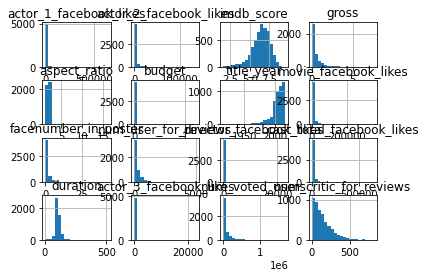

In [20]:
df_nums.hist(bins=20)

In [21]:
#The variables with skewness > 1 such as wheelbase, compressionratio, horsepower, price are highly positively skewed.
#The variables with skewness < -1 are highly negatively skewed.
#The variables with 0.5 < skewness < 1 such as carwidth, curbweight, citympg are moderately positively skewed.
# The variables with -0.5 < skewness < -1 such as stroke are moderately negatively skewed.
# And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed such as symboling, carheight, boreration, peakrpm, highwaympg.
df_nums.skew().sort_values()

title_year                   -2.292273
imdb_score                   -0.741471
num_critic_for_reviews        1.516533
duration                      2.339134
gross                         3.127204
num_voted_users               4.029871
num_user_for_reviews          4.121475
facenumber_in_poster          4.384766
movie_facebook_likes          5.058927
director_facebook_likes       5.229701
actor_3_facebook_likes        7.279021
aspect_ratio                  9.390056
actor_2_facebook_likes        9.884733
cast_total_facebook_likes    12.831928
actor_1_facebook_likes       19.121776
budget                       48.157435
dtype: float64

#### Preprocess Data

In [22]:
df_nums=df_nums.dropna(subset=['num_critic_for_reviews'],axis=0)

In [23]:
df_nums.isna().sum()

actor_1_facebook_likes         6
actor_2_facebook_likes        11
imdb_score                     0
gross                        837
aspect_ratio                 294
budget                       473
title_year                    99
movie_facebook_likes           0
facenumber_in_poster          12
num_user_for_reviews           0
director_facebook_likes       99
cast_total_facebook_likes      0
duration                      11
actor_3_facebook_likes        19
num_voted_users                0
num_critic_for_reviews         0
dtype: int64

In [24]:
df_nums.shape

(4993, 16)

In [25]:
x=df_nums.drop(['num_critic_for_reviews'],axis=1)
y=df_nums['num_critic_for_reviews'].to_numpy()

In [27]:
y

array([723., 302., 602., ...,  13.,  14.,  43.])

In [26]:
y.shape

(4993,)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=100)

In [29]:
x_train.sort_index().head()

,actor_1_facebook_likes,actor_2_facebook_likes,imdb_score,gross,aspect_ratio,budget,title_year,movie_facebook_likes,facenumber_in_poster,num_user_for_reviews,director_facebook_likes,cast_total_facebook_likes,duration,actor_3_facebook_likes,num_voted_users
1,40000.0,5000.0,7.1,309404152.0,2.35,300000000.0,2007.0,0,0.0,1238.0,563.0,48350,169.0,1000.0,471220
2,11000.0,393.0,6.8,200074175.0,2.35,245000000.0,2015.0,85000,1.0,994.0,0.0,11700,148.0,161.0,275868
3,27000.0,23000.0,8.5,448130642.0,2.35,250000000.0,2012.0,164000,0.0,2701.0,22000.0,106759,164.0,23000.0,1144337
7,799.0,553.0,7.8,200807262.0,1.85,260000000.0,2010.0,29000,1.0,387.0,15.0,2036,100.0,284.0,294810
8,26000.0,21000.0,7.5,458991599.0,2.35,250000000.0,2015.0,118000,4.0,1117.0,0.0,92000,141.0,19000.0,462669


In [30]:
x_train.shape

(3495, 15)

In [31]:
x_train.describe()

,actor_1_facebook_likes,actor_2_facebook_likes,imdb_score,gross,aspect_ratio,budget,title_year,movie_facebook_likes,facenumber_in_poster,num_user_for_reviews,director_facebook_likes,cast_total_facebook_likes,duration,actor_3_facebook_likes,num_voted_users
count,3491.000000,3488.000000,3495.000000,2.912000e+03,3287.000000,3.166000e+03,3424.000000,3495.000000,3488.000000,3495.000000,3424.000000,3495.000000,3488.000000,3483.000000,3.495000e+03
mean,6823.605557,1723.124713,6.428670,4.793935e+07,2.238847,4.138214e+07,2002.232477,7440.963090,1.356078,270.942489,647.475759,10090.008298,107.764622,675.168533,8.330305e+04
std,16454.100155,4331.522489,1.133553,6.715423e+07,1.477258,2.340352e+08,12.655864,19153.883615,2.054307,370.282707,2707.109525,19652.395833,25.413900,1769.766669,1.352022e+05
min,0.000000,0.000000,1.700000,1.620000e+02,1.180000,2.180000e+02,1920.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,5.000000e+00
25%,629.000000,294.000000,5.800000,5.030191e+06,1.850000,6.000000e+06,1999.000000,0.000000,0.000000,67.000000,7.000000,1442.500000,94.000000,135.000000,8.689500e+03
50%,1000.000000,610.500000,6.600000,2.509822e+07,2.350000,2.000000e+07,2005.000000,166.000000,1.000000,157.000000,51.000000,3133.000000,104.000000,379.000000,3.435900e+04
75%,11000.000000,920.250000,7.200000,6.101175e+07,2.350000,4.500000e+07,2011.000000,3000.000000,2.000000,326.000000,209.000000,14152.500000,118.000000,635.000000,9.485200e+04
max,640000.000000,137000.000000,9.100000,6.521773e+08,16.000000,1.221550e+10,2016.000000,349000.000000,43.000000,5060.000000,23000.000000,656730.000000,511.000000,23000.000000,1.468200e+06


array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'gross'}>],
       [<AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>, <AxesSubplot:>]],
      dtype=object)

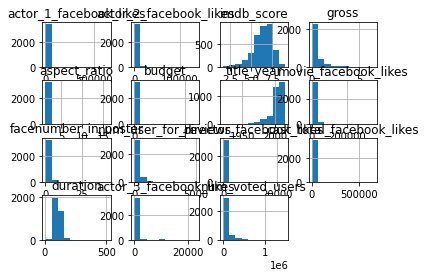

In [32]:
x_train.hist()

##### Change distribution to be normalized

array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'gross'}>],
       [<AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>, <AxesSubplot:>]],
      dtype=object)

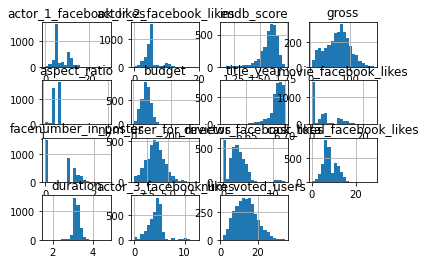

In [33]:
x_train=np.sqrt(np.sqrt(x_train))
x_train.hist(bins=20)


In [34]:
x_test=np.sqrt(np.sqrt(x_test))

##### fill missing values

In [35]:
x_train.head()

,actor_1_facebook_likes,actor_2_facebook_likes,imdb_score,gross,aspect_ratio,budget,title_year,movie_facebook_likes,facenumber_in_poster,num_user_for_reviews,director_facebook_likes,cast_total_facebook_likes,duration,actor_3_facebook_likes,num_voted_users
2050,10.241137,5.623413,1.571565,112.728716,1.166253,66.874030,6.685731,0.000000,0.000000,4.161791,3.517004,10.843028,3.080070,4.545765,18.590734
2942,5.616371,5.196152,1.577967,74.710812,1.166253,58.856619,6.688239,0.000000,1.189207,3.177972,2.759669,8.839372,3.105423,5.183634,14.370255
285,10.241137,10.000000,1.649331,127.222271,1.238132,100.000000,6.689074,0.000000,1.000000,5.412175,0.000000,13.743010,3.631929,9.740037,24.951716
968,11.066819,4.319115,1.571565,86.153668,1.166253,88.011174,6.696579,12.818610,1.000000,4.258915,3.522737,11.177298,3.231146,3.464102,21.015155
4533,5.451176,4.049842,1.614832,NaN,1.081883,31.622777,6.656257,4.255675,1.000000,2.735565,2.806066,6.084983,3.316625,2.882121,9.604104


In [36]:
imputer=impute.SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(x_train)
x_train=pd.DataFrame(imputer.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(imputer.transform(x_test),columns=x_train.columns)

In [37]:
x_train.head()

,actor_1_facebook_likes,actor_2_facebook_likes,imdb_score,gross,aspect_ratio,budget,title_year,movie_facebook_likes,facenumber_in_poster,num_user_for_reviews,director_facebook_likes,cast_total_facebook_likes,duration,actor_3_facebook_likes,num_voted_users
0,10.241137,5.623413,1.571565,112.728716,1.166253,66.874030,6.685731,0.000000,0.000000,4.161791,3.517004,10.843028,3.080070,4.545765,18.590734
1,5.616371,5.196152,1.577967,74.710812,1.166253,58.856619,6.688239,0.000000,1.189207,3.177972,2.759669,8.839372,3.105423,5.183634,14.370255
2,10.241137,10.000000,1.649331,127.222271,1.238132,100.000000,6.689074,0.000000,1.000000,5.412175,0.000000,13.743010,3.631929,9.740037,24.951716
3,11.066819,4.319115,1.571565,86.153668,1.166253,88.011174,6.696579,12.818610,1.000000,4.258915,3.522737,11.177298,3.231146,3.464102,21.015155
4,5.451176,4.049842,1.614832,70.780022,1.081883,31.622777,6.656257,4.255675,1.000000,2.735565,2.806066,6.084983,3.316625,2.882121,9.604104


##### scale features

In [38]:
scaler=preprocessing.StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_train.columns)

In [40]:
x_train.describe()

,actor_1_facebook_likes,actor_2_facebook_likes,imdb_score,gross,aspect_ratio,budget,title_year,movie_facebook_likes,facenumber_in_poster,num_user_for_reviews,director_facebook_likes,cast_total_facebook_likes,duration,actor_3_facebook_likes,num_voted_users
count,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03,3.495000e+03
mean,-1.668511e-16,2.246256e-17,3.238536e-15,6.651808e-17,-1.196484e-15,1.380552e-16,6.611318e-14,1.470132e-16,-5.228690e-16,1.383093e-16,-2.837978e-16,5.038094e-17,-3.947248e-16,2.460280e-16,-1.296372e-16
std,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00
min,-2.208581e+00,-2.473750e+00,-5.770706e+00,-2.404275e+00,-1.839492e+00,-2.678479e+00,-6.631595e+00,-8.826568e-01,-1.102580e+00,-2.311430e+00,-1.291262e+00,-2.577518e+00,-8.719045e+00,-2.771044e+00,-2.161493e+00
25%,-6.555656e-01,-4.730328e-01,-4.549459e-01,-5.720272e-01,-4.803875e-01,-6.024469e-01,-2.588134e-01,-8.826568e-01,-1.102580e+00,-6.421385e-01,-5.440514e-01,-6.675491e-01,-5.127045e-01,-5.403812e-01,-7.431551e-01
50%,-4.654070e-01,-7.407965e-02,2.055881e-01,7.674189e-02,3.073968e-01,2.016985e-02,2.174265e-01,-1.766079e-01,5.416379e-01,-3.329890e-02,-6.365026e-02,-2.588560e-01,-7.291201e-02,1.084163e-01,-5.483506e-02
75%,9.660179e-01,1.846364e-01,6.625680e-01,5.920770e-01,3.073968e-01,5.619006e-01,6.134772e-01,5.730975e-01,8.527356e-01,6.030247e-01,4.297545e-01,8.027849e-01,4.923449e-01,5.049623e-01,6.290938e-01
max,6.559119e+00,6.813995e+00,1.943088e+00,3.362942e+00,8.657412e+00,1.139066e+01,1.087764e+00,3.898292e+00,3.107850e+00,4.356816e+00,4.365924e+00,6.245030e+00,8.541254e+00,5.265757e+00,3.629320e+00


##### select feature

In [41]:
train=x_train.copy()
train['num_critic_for_reviews']=y_train

In [43]:
train.corr()['num_critic_for_reviews'].abs().sort_values(ascending=False)

num_critic_for_reviews       1.000000
num_voted_users              0.758047
num_user_for_reviews         0.720005
movie_facebook_likes         0.557685
gross                        0.425164
budget                       0.419756
cast_total_facebook_likes    0.374189
actor_1_facebook_likes       0.361974
actor_2_facebook_likes       0.348820
actor_3_facebook_likes       0.307344
imdb_score                   0.301947
duration                     0.270284
title_year                   0.266974
director_facebook_likes      0.181218
facenumber_in_poster         0.073648
aspect_ratio                 0.016283
Name: num_critic_for_reviews, dtype: float64

In [48]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=SGDRegressor()).fit(x_train, y_train)
selector.get_support(indices=True)

array([ 6,  7,  9, 14])

In [49]:
for i in selector.get_support(indices=True).tolist():
    print(x_train.columns[i])

title_year
movie_facebook_likes
num_user_for_reviews
num_voted_users


In [70]:
selected_features_1=['num_voted_users','num_user_for_reviews','movie_facebook_likes','title_year']

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k=3)
# learn relationship from training data
fs.fit(x_train, y_train)
fs.get_support(indices=True)

array([ 7,  9, 14])

In [51]:
for i in fs.get_support(indices=True):
    print(x_train.columns[i])

movie_facebook_likes
num_user_for_reviews
num_voted_users


In [52]:
selected_features_2=['num_voted_users','num_user_for_reviews','movie_facebook_likes']

In [53]:
train=x_train[selected_features_2].copy()
train['num_critic_for_reviews']=y_train
train.corr()

,num_voted_users,num_user_for_reviews,movie_facebook_likes,num_critic_for_reviews
num_voted_users,1.000000,0.898814,0.384228,0.758047
num_user_for_reviews,0.898814,1.000000,0.287348,0.720005
movie_facebook_likes,0.384228,0.287348,1.000000,0.557685
num_critic_for_reviews,0.758047,0.720005,0.557685,1.000000


In [54]:
selected_features=['num_voted_users','movie_facebook_likes']

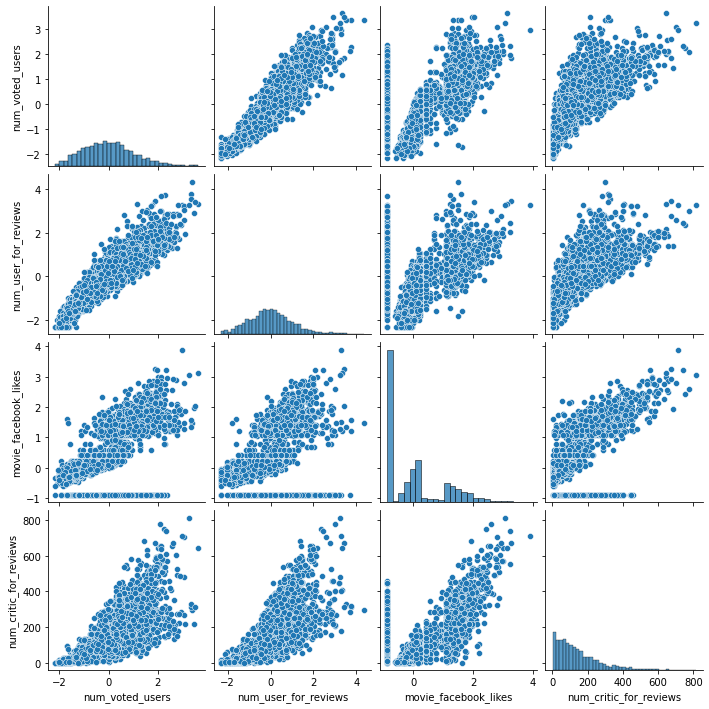

In [55]:
sns.pairplot(train)

#### Model

##### train

In [56]:
lr=SGDRegressor(random_state=100)
lr.fit(x_train[selected_features],y_train)

SGDRegressor(random_state=100)

In [57]:
y_train_pred=pd.DataFrame(lr.predict(x_train[selected_features]))

In [58]:
print('mae :',metrics.mean_absolute_error(y_train, y_train_pred))
print('mse :',metrics.mean_squared_error(y_train, y_train_pred))
print('mape :',metrics.mean_absolute_percentage_error(y_train, y_train_pred))
print('r2 :',metrics.r2_score(y_train, y_train_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_train, y_train_pred))*(len(x_train)-1)/(len(x_train)-3-1))


mae : 51.438539242878015
mse : 5057.337848168618
mape : 1.0904867218352814
r2 : 0.6578181961735259
Adjusted r2 : 0.6575241413435404


##### test

In [60]:
y_test_pred=pd.DataFrame(lr.predict(x_test[selected_features]))

#### Validation

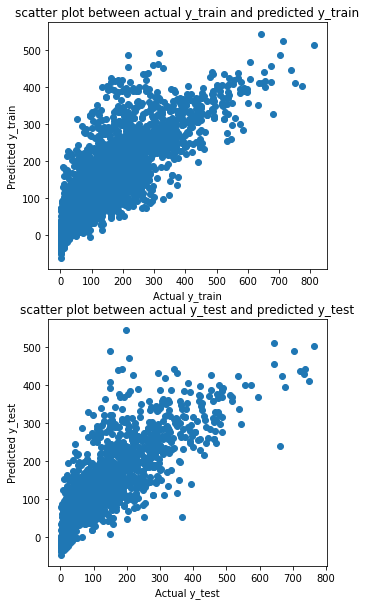

In [61]:
fig,(ax1, ax2)=plt.subplots(2,1,figsize=(5,10))
ax1.scatter(y_train,y_train_pred)
ax1.set_xlabel('Actual y_train')
ax1.set_ylabel('Predicted y_train')
ax1.set_title('scatter plot between actual y_train and predicted y_train')
ax2.scatter(y_test,y_test_pred)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
plt.show()

In [62]:
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('r2 :',metrics.r2_score(y_test, y_test_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(x_test)-1)/(len(x_test)-2-1))


mae : 54.15565152282173
mse : 5696.350965236943
mape : 1.001123642512233
r2 : 0.6149492526332829
Adjusted r2 : 0.6144341345766051


In [63]:
lr.coef_

array([77.64078023, 39.13317594])

In [64]:
lr.intercept_

array([140.03939705])

In [65]:
equation=str(round(lr.intercept_[0],4))
for i,c in enumerate(lr.coef_):
    equation=equation+"+"+str(round(c,4))+" * sqrt(sqrt("+selected_features[i]+'))'

print(equation)

140.0394+77.6408 * sqrt(sqrt(num_voted_users))+39.1332 * sqrt(sqrt(movie_facebook_likes))


#### Hyperparameters

In [67]:
a=['constant', 'optimal', 'invscaling']
c = [0.00001,0.0001,0.001,0.01,0.1] 
param_grid = dict(learning_rate=a,eta0=c)
clf=SGDRegressor(max_iter=10000)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='r2') 
grid_result = grid.fit(x_train[selected_features], y_train) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_)

Best Score:  0.6562604721020499
Best Params:  {'eta0': 0.001, 'learning_rate': 'constant'}


In [68]:
y_test_pred=grid.predict(x_test[selected_features])
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('r2 :',metrics.r2_score(y_test, y_test_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(x_test)-1)/(len(x_test)-2-1))

mae : 53.99693440637725
mse : 5677.052800268464
mape : 0.9803049244233589
r2 : 0.6162537320955328
Adjusted r2 : 0.6157403591618813


#### 4 features Model

In [71]:
lr_1=SGDRegressor()
lr_1.fit(x_train[selected_features_1],y_train)
y_test_pred_1=pd.DataFrame(lr_1.predict(x_test[selected_features_1]))
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred_1))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred_1))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred_1))
print('r2 :',metrics.r2_score(y_test, y_test_pred_1))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred_1))*(len(x_test)-1)/(len(x_test)-4-1))

mae : 49.45825318839057
mse : 4554.765024094313
mape : 1.115952982314188
r2 : 0.6921159374992361
Adjusted r2 : 0.6912910639225428


#### All features Model

In [72]:
lr_all=SGDRegressor()
lr_all.fit(x_train,y_train)
y_test_pred_all=pd.DataFrame(lr_all.predict(x_test))
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred_all))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred_all))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred_all))
print('r2 :',metrics.r2_score(y_test, y_test_pred_all))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred_all))*(len(x_test)-1)/(len(x_test)-13-1))

mae : 48.50175328090999
mse : 4461.767602593605
mape : 1.1412517063192735
r2 : 0.6984021945909347
Adjusted r2 : 0.6957601652982677
